<a href="https://colab.research.google.com/github/JuliandaO34/ML-STUDENTS/blob/main/RegresionLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

R²: 0.669
MSE: 24.29
RMSE: 4.93
MAE: 3.19
   Variable  Coeficiente
0      CRIM    -0.113056
1        ZN     0.030110
2     INDUS     0.040381
3      CHAS     2.784438
4       NOX   -17.202633
5        RM     4.438835
6       AGE    -0.006296
7       DIS    -1.447865
8       RAD     0.262430
9       TAX    -0.010647
10  PTRATIO    -0.915456
11        B     0.012351
12    LSTAT    -0.508571


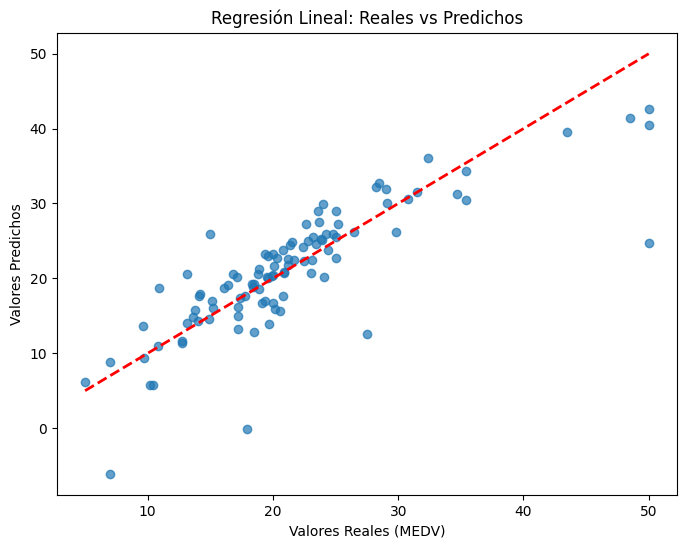

In [ ]:
# ===============================
# 📌 1. Importar librerías
# ===============================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# ===============================
# 📌 2. Cargar datos
# ===============================
# Cambia la ruta si es necesario
file_path = "Boston-house-price-data.csv"
df = pd.read_csv(file_path, delimiter=';')

# Verifica que los datos se vean bien
df.head()

# ===============================
# 📌 3. Definir variables
# ===============================
X = df.drop('MEDV', axis=1)  # Variables independientes
y = df['MEDV']               # Variable dependiente

# ===============================
# 📌 4. Dividir en entrenamiento y prueba
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===============================
# 📌 5. Crear y entrenar modelo
# ===============================
model = LinearRegression()
model.fit(X_train, y_train)

# ===============================
# 📌 6. Hacer predicciones
# ===============================
y_pred = model.predict(X_test)

# ===============================
# 📌 7. Calcular métricas
# ===============================
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"R²: {r2:.3f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# ===============================
# 📌 8. Mostrar coeficientes
# ===============================
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_
})
print(coef_df)

# ===============================
# 📌 9. Gráfico: valores reales vs predichos
# ===============================
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--r', linewidth=2)
plt.xlabel('Valores Reales (MEDV)')
plt.ylabel('Valores Predichos')
plt.title('Regresión Lineal: Reales vs Predichos')
plt.show()


In [ ]:
# Generar entradas
new_data = {}
for col in X.columns:
    value = float(input(f"Ingrese valor para {col}: "))
    new_data[col] = [value]

# Crear DataFrame para la predicción
new_df = pd.DataFrame(new_data)

# Hacer predicción
predicted_price = model.predict(new_df)

print(f"\n✅ Precio estimado de la casa (MEDV): {predicted_price[0]:.2f}")

# ===============================
# 📌 8. (Opcional) Mostrar coeficientes
# ===============================
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_
})
print("\nCoeficientes del modelo:")
print(coef_df)